<img src="imgs/logo-spegc.svg" width=30%>

# Redes Neuronales

Una red neuronal es un clasificador. Su funcionamiento se basa en la combinación de hiperplanos que acotan regiones de activación del espacio de muestras.

<img src="images/red.svg" width=30%>

### Mini-batch

En cada ciclo de actualización de los pesos de la red no es necesario calcular el gradiente de descenso para cada muestra. Basta con escoger un lote variado de muestras (mini-batch) y calcular el gradiente resultante de éste. 

### Loss

La pérdida o *loss* es el valor o error resultante de comparar las predicciones de la red con las etiquetas de las muestras.

### One-hot

Cuando se clasifica en más de dos categorías es necesario que la red tenga tantas neuronas en la capa de salida como clases haya. Por tanto, la activación de cada una de estas neuronas de salida corresponderá con una clase. Por ejemplo, si la red tiene cuatro salidas y se activa la tercera, el vector resultante podría ser algo como: [0.002,0.008,0.95,0.04]. Como normalmente las etiquetas de las muestras están en un formato numérico entero (0,1,2,3...), no podremos realizar la comparación de las salidas con las etiquetas. Así que transformamos la etiqueta en un vector de todo ceros excepto el lugar correspondiente a la etiqueta, el cual tendrá un valor de 1. Por ejemplo: $2\rightarrow [0,0,1,0]$. (Recordemos que las etiquetas comienzan en 0). Esta función de transformación se denomina **One-hot**.

### Época

Cada vez que entrenamos una red con todos los lotes o *mini-batches* de nuestro dataset de entrenamiento decimos que hemos completado una **época**. Durante el proceso de entrenamiento de una red se suelen completar múltiples épocas.

### Softmax

La función softmax es parecida a la sigmoide, ésta también convierte un valor entre menos infinito y más infinito en un valor entre cero y uno. La diferencia está en que la función softmax no trabaja sobre un valor sino sobre un vector. De esta forma, convierte todas las componentes de un vector en valores entre cero y uno, pero, además, garantiza que la suma de todos estos valores sea uno. La función softmax se emplea en la capa de salida de una red, y convierte de esta forma sus salidas en una distribución de probabilidades.

$$ Softmax(\textbf{v})_i = \frac{e^{v_i}}{\sum_{j=1}^{n} e^{v_j}} $$


## Ejemplo

In [1]:
import numpy as np
from NN4Teaching import nn4t

data = np.genfromtxt('data/iris.data', delimiter=",")
np.random.shuffle(data)
x_data = data[:, 0:4].astype('f4')
y_data = nn4t.one_hot(data[:, 4].astype(int), 3)

net = nn4t.Net(layers=[4, 5, 3])

for i in range(900):
    net.train(x_data, y_data)
    
    if i%50 == 0:
        print("Epoch: ", i)
        print(net.loss(x_data, y_data))

for x, y in zip(x_data[:15], y_data[:15]):
    print(y)
    print(net.output(x))

Epoch:  0
100.0241785155582
Epoch:  50
18.96970400644156
Epoch:  100
13.170055295126776
Epoch:  150
10.078138508157224
Epoch:  200
11.287388269558202
Epoch:  250
9.072072838793838
Epoch:  300
9.549119750582014
Epoch:  350
7.616170034709143
Epoch:  400
7.397081174278847
Epoch:  450
7.324136739990396
Epoch:  500
7.080802811213137
Epoch:  550
6.827754198271204
Epoch:  600
6.596711911850958
Epoch:  650
6.395546377461482
Epoch:  700
6.224170093838008
Epoch:  750
6.078200099412709
Epoch:  800
5.952458904913701
Epoch:  850
5.842759085558164
[0. 0. 1.]
[3.62718395e-05 2.16039372e-02 9.82853189e-01]
[0. 0. 1.]
[3.71374500e-05 2.20796788e-02 9.82401566e-01]
[0. 1. 0.]
[0.00851308 0.99211851 0.00759403]
[1. 0. 0.]
[9.89908901e-01 9.17519090e-03 9.03354235e-04]
[1. 0. 0.]
[9.89130249e-01 1.00110080e-02 9.03670496e-04]
[0. 0. 1.]
[4.45555152e-05 2.61783913e-02 9.78484860e-01]
[0. 1. 0.]
[0.01368775 0.99671645 0.00318108]
[0. 1. 0.]
[0.02365453 0.99421009 0.00276636]
[1. 0. 0.]
[9.86929938e-01 1.243

### Ejercicios

- Entrena la red mediante mini-batchs.
- Crea un gráfico del loss.
- Finaliza el entrenamiento cuando la curva del loss se estabilice.
- Divide el dataset en entrenamiento y test.
- Calcula la precisión final de la red.

<img src="imgs/keras-logo.png" width=30%>

## Keras
https://keras.io/

Keras es una API de redes neuronales de alto nivel, escrita en Python y capaz de ejecutarse sobre TensorFlow, CNTK o Theano. Fue desarrollado con la idea de permitir la experimentación rápida, poder pasar de la idea al resultado en el menor tiempo posible.

Veamos cómo montar una red en Keras para clasificar el dataset Iris. En primer lugar importamos la librería y el dataset. La función `LabelBinarizer` nos convertirá las etiquetas numéricas enteras a codificación one-hot.

In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

#load the iris dataset
iris = load_iris()

X = iris.data
encoder = LabelBinarizer()
y = encoder.fit_transform(iris.target)  # We transform to one-hot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Creamos la red con la capa de entrada correspondiente a los cuatro valores de cada muestra. Una capa oculta de cinco neuronas y una capa de salida de tres neuronas. Aplicamos la función de activación **sigmoide** para la capa oculta y, dado que tenemos más de dos clases, **softmax** para la salida. Utilizamos *Stochastic Gradient Descent* como método optimizador con un **learning rate** de 0.01.

In [11]:
from keras.models import Sequential #Sequential Models
from keras.layers import Dense #Dense Fully Connected Layer Type
from keras.optimizers import SGD #Stochastic Gradient Descent Optimizer

def create_network():
    model = Sequential()
    model.add(Dense(5, input_shape=(4,), activation='sigmoid'))
    model.add(Dense(3, activation='softmax'))
        
    #stochastic gradient descent
    sgd = SGD(lr=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

Entrenamos realizando 500 épocas sobre el conjunto de entrenamiento. Utilizamos un tamaño del lote (`batch_size`) de 10. Esto quiere decir que actualizamos todos los pesos de nuetra red utilizando solo 10 muestas.

In [ ]:
neural_network = create_network()
neural_network.fit(X_train, y_train, epochs=500, batch_size=10)

Echemos un vistazo a los resultados.

In [13]:
print(neural_network.metrics_names)
neural_network.evaluate(X_test, y_test, verbose=1)

['loss', 'acc']
38/38 [==============================] - 0s 948us/step


[0.20326391568309382, 1.0]

In [14]:
predictions = neural_network.predict(X_test)
for p, l in zip(predictions, y_test):
    print(p,"->", l)

[0.05179366 0.7378154  0.210391  ] -> [0 1 0]
[0.9341109  0.06442137 0.00146782] -> [1 0 0]
[0.9381783  0.06046955 0.00135211] -> [1 0 0]
[0.0105612  0.35811108 0.63132775] -> [0 0 1]
[0.00727583 0.285715   0.7070092 ] -> [0 0 1]
[0.9398889  0.0588021  0.00130903] -> [1 0 0]
[0.08640046 0.80808187 0.10551766] -> [0 1 0]
[0.93938214 0.05929988 0.00131804] -> [1 0 0]
[0.00629416 0.2608005  0.7329053 ] -> [0 0 1]
[0.93938214 0.05929988 0.00131804] -> [1 0 0]
[0.95363325 0.04539875 0.00096797] -> [1 0 0]
[0.00795827 0.30947852 0.68256325] -> [0 0 1]
[0.01081503 0.3722383  0.6169466 ] -> [0 0 1]
[0.03380301 0.64731145 0.3188856 ] -> [0 1 0]
[0.10818747 0.7796943  0.11211824] -> [0 1 0]
[0.9416797  0.05707126 0.00124911] -> [1 0 0]
[0.04211864 0.69072473 0.26715663] -> [0 1 0]
[0.9534569  0.04556115 0.00098188] -> [1 0 0]
[0.02265538 0.5371734  0.44017118] -> [0 1 0]
[0.9418448  0.05687665 0.00127851] -> [1 0 0]
[0.16318765 0.7778622  0.05895017] -> [0 1 0]
[0.22207181 0.72331935 0.0546088 ]

Una vez creado y entrenado nuestro modelo querremos guardarlo para usarlo en producción.

In [8]:
from keras.models import load_model

neural_network.save("mimodelo.h5")

Supongamos que apagamos nuestro ordenador (`del neural_network`). Si queremos cargarlo de nuevo haremos:

In [ ]:
del neural_network  # deletes the existing model

# we return a compiled model
# identical to the previous one
model = load_model('mimodelo.h5')
print(model.metrics_names)
model.evaluate(X_test, y_test, verbose=1)

### Ejercicios
- Crea una red para clasificar el conjunto MNIST

# Redes Neuronales Recurrentes

In [ ]:
import numpy as np
import sampledata

batch_size = 10
number_of_neurons = 5
digits = 8

data, label = sampledata.create_data(500)
print(data.shape)
print(label.shape)
label = label.reshape((500, 8, 1))
print(label.shape)

# Model ------------------------------------------------
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN, TimeDistributed
from keras import optimizers

model = Sequential()
model.add(SimpleRNN(number_of_neurons, input_shape=(data.shape[1:]), activation='sigmoid', return_sequences=True, use_bias=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))

sgd = optimizers.SGD(lr=1.)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# train RNN
model.fit(data, label, epochs=100, batch_size=batch_size, verbose=1)

Veamos qué tal ha aprendido a sumar nuestra RNN.

In [4]:
# Test ----------------------------------------------------

data, label = sampledata.create_data(100)
label = label.reshape((100, 8, 1))

error = model.evaluate(data, label, verbose=2)

data, label = sampledata.create_data(2)
predicted = np.round(model.predict(data))

for d, l, r in zip(data, label, predicted.reshape(2, 8)):
    print("data:")
    print(" ", np.transpose(d)[0][::-1])
    print("+", np.transpose(d)[1][::-1])
    print("------------------------------")
    print(" ", r[::-1], "result")
    print(" ", l[::-1], "label")
    print()
    print()

print("Precisión: "+ str(error[1]*100) + "%")
print("------------------------------")




data:
  [0. 1. 0. 1. 1. 1. 1. 1.]
+ [0. 0. 1. 0. 0. 1. 1. 0.]
------------------------------
  [1. 0. 0. 0. 0. 1. 0. 1.] result
  [1. 0. 0. 0. 0. 1. 0. 1.] label


data:
  [0. 1. 0. 1. 1. 0. 0. 0.]
+ [0. 0. 1. 1. 0. 1. 1. 0.]
------------------------------
  [1. 0. 0. 0. 1. 1. 1. 0.] result
  [1. 0. 0. 0. 1. 1. 1. 0.] label


Precisión: 100.0%
------------------------------


## Ajuste a una curva

In [1]:
from NN4Teaching import nn4t
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0.0, 10.0, 0.1)
secuencia = (np.sin(x-1)*0.5+0.1*np.sin(5*x)+1.5)*0.2 # Nuestra secuencia de valores


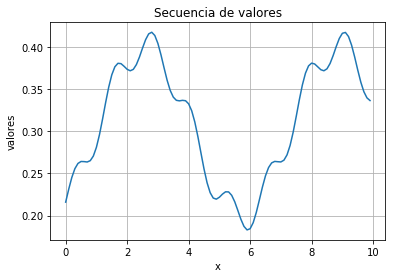

[0.2158529  0.23125582 0.24509381 0.25552813 0.2617217  0.26402689
 0.26388057 0.26343231 0.26499702 0.27046606]
[0.28082151450673726]
----------------------
[0.23125582 0.24509381 0.25552813 0.2617217  0.26402689 0.26388057
 0.26343231 0.26499702 0.27046606 0.28082151]
[0.295872535153275]
----------------------
[0.24509381 0.25552813 0.2617217  0.26402689 0.26388057 0.26343231
 0.26499702 0.27046606 0.28082151 0.29587254]
[0.3142786231155277]


In [2]:
plt.plot(x, secuencia)
plt.xlabel('x')
plt.ylabel('valores')
plt.title('Secuencia de valores')
plt.grid(True)
plt.show()

longitud_muestra = 10 #Elegido arbitrariamente

muestras_vector = []
etiquetas_vector = []
for i in range(len(secuencia)-longitud_muestra):
    muestras_vector.append(secuencia[i:i+longitud_muestra])
    etiquetas_vector.append([secuencia[i+longitud_muestra]])
    
    
    
print(muestras_vector[0])
print(etiquetas_vector[0])
print("----------------------")
print(muestras_vector[1])
print(etiquetas_vector[1])
print("----------------------")
print(muestras_vector[2])
print(etiquetas_vector[2])

In [3]:
net = nn4t.Net(layers=[longitud_muestra, 5, 1])

for i in range(5000):
    net.train(muestras_vector, etiquetas_vector)
    
    if i%500 == 0:
        print("Epoch: ", i)
        print(net.loss(muestras_vector, etiquetas_vector))

Epoch:  0
0.40896674193232857
Epoch:  500
0.033473701542416225
Epoch:  1000
0.014661295598602783
Epoch:  1500
0.004771790610453958
Epoch:  2000
0.001005698905204102
Epoch:  2500
0.00014481396307928593
Epoch:  3000
1.6486625550970057e-05
Epoch:  3500
1.6729068556061936e-06
Epoch:  4000
1.6164746217917844e-07
Epoch:  4500
1.532520844219181e-08


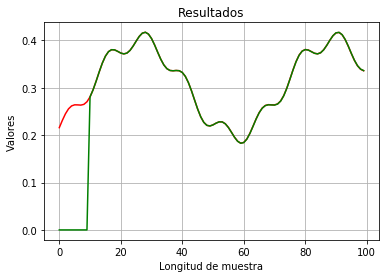

In [4]:
resultados = []

for i in range(longitud_muestra):
    resultados.append(muestras_vector[0][i])
        
for i in range(len(secuencia)-longitud_muestra):
    resultados.append(net.output(resultados[i:i+longitud_muestra])[0])
   
etiquetas_vector = ([[0]]*longitud_muestra) + etiquetas_vector

plt.plot(resultados, 'r-', etiquetas_vector, 'g-')
plt.xlabel('Longitud de muestra')
plt.ylabel('Valores')
plt.title('Resultados')
plt.grid(True)
plt.show()

## Ejercicios

- Realizar la predicción de las <a href="./data/solar_spots.csv">manchas solares</a>
- Medir el error medio y desviación típica

## Autoencoder

In [13]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Dense #Dense Fully Connected Layer Type
from keras.optimizers import SGD #Stochastic Gradient Descent Optimizer

(x_train, _), (_, _) = mnist.load_data()

max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value

x_train = x_train.reshape((len(x_train), -1))

In [75]:
def create_network():
    model = Sequential()
    model.add(Dense(50, input_shape=(784,), activation='relu'))
    model.add(Dense(784, activation='sigmoid'))
        
    #stochastic gradient descent
    ##sgd = SGD(lr=0.1)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [76]:
neural_network = create_network()
neural_network.fit(x_train[:30000], x_train[:30000], epochs=20, batch_size=256)

Epoch 1/20
30000/30000 [==============================] - 2s 65us/step - loss: 0.0832
Epoch 2/20
30000/30000 [==============================] - 1s 44us/step - loss: 0.0416
Epoch 3/20
30000/30000 [==============================] - 1s 44us/step - loss: 0.0323
Epoch 4/20
30000/30000 [==============================] - 1s 45us/step - loss: 0.0263
Epoch 5/20
30000/30000 [==============================] - 1s 42us/step - loss: 0.0222
Epoch 6/20
30000/30000 [==============================] - 1s 41us/step - loss: 0.0192
Epoch 7/20
30000/30000 [==============================] - 1s 42us/step - loss: 0.0168
Epoch 8/20
30000/30000 [==============================] - 1s 42us/step - loss: 0.0150
Epoch 9/20
30000/30000 [==============================] - 1s 43us/step - loss: 0.0135
Epoch 10/20
30000/30000 [==============================] - 1s 44us/step - loss: 0.0122
Epoch 11/20
30000/30000 [==============================] - 1s 43us/step - loss: 0.0111
Epoch 12/20
30000/30000 [===========================

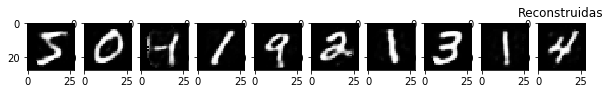

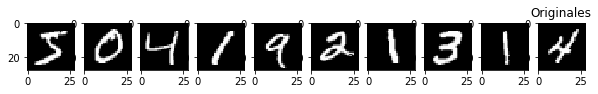

In [81]:
import matplotlib.pyplot as plt

rets = neural_network.predict(x_train[:10])

plt.figure(figsize=(10,4))
for i, ret in enumerate(rets):
    plt.subplot(1, 10, i+1)
    plt.imshow(rets[i].reshape((28, 28)), cmap='gray')
plt.title("Reconstruidas")
plt.show()

plt.figure(figsize=(10,4))
for i, ret in enumerate(x_train[:10]):
    plt.subplot(1, 10, i+1)
    plt.imshow(ret.reshape((28, 28)), cmap='gray')
plt.title("Originales")
plt.show()
